In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
import shutil
from pathlib import Path
import warnings

warnings.filterwarnings("ignore")
matplotlib.style.use('seaborn')

In [33]:
# Configurations

make_country_histograms = False  # 45min, 250MB
make_continent_histograms = False  # 5min, 5MB

In [34]:
# Class definitions

class Location(object):
    def init(self, name, population, cases, deaths, vaccinated,
                 casesPerCapita, deathsPerCapita, vaccinatedPerCapita):
        
        self.name = name
        self.population = population
        self.cases = cases
        self.deaths = deaths
        self.vaccinated = vaccinated
        self.casesPerCapita = casesPerCapita
        self.deathsPerCapita = deathsPerCapita
        self.vaccinatedPerCapita = vaccinatedPerCapita

In [35]:
# Function definitions

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=10,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
            
    return ax

In [36]:
raw_data = pd.read_csv(r"Data\Raw_data\owid-covid-data.csv")
data = pd.read_csv(r"Data\Sliced_data\covid_data.csv")

raw_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [37]:
continents = ['Africa', 'Asia', 'Europe', 'NorthAmerica', 'SouthAmerica', 'Oceania']
cont_label = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

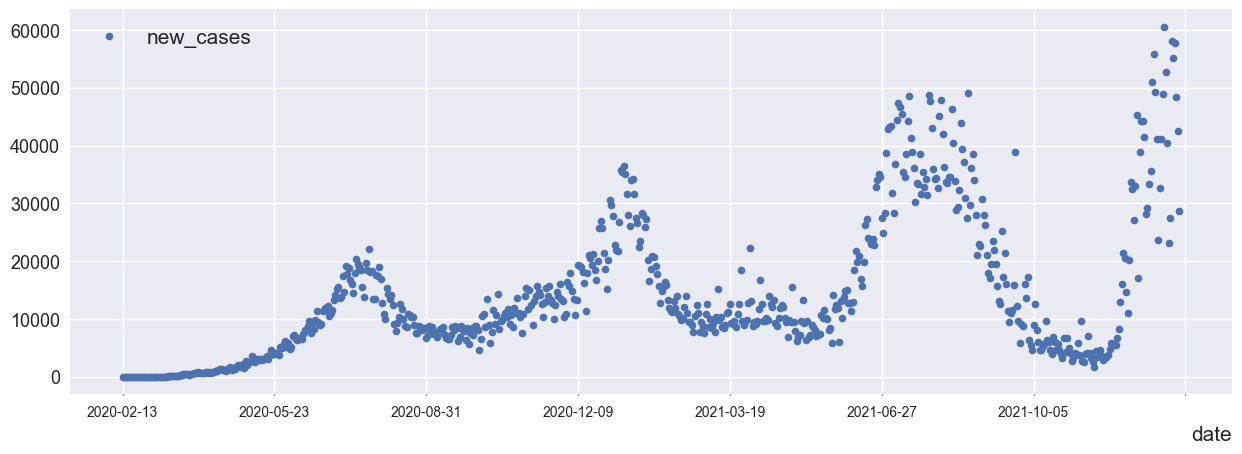

In [38]:
df1 = data.set_index('location')

_ = df1.loc['Africa'].plot(x='date', y='new_cases', style='.', figsize=(15,5), title='')
fig = _.get_figure()

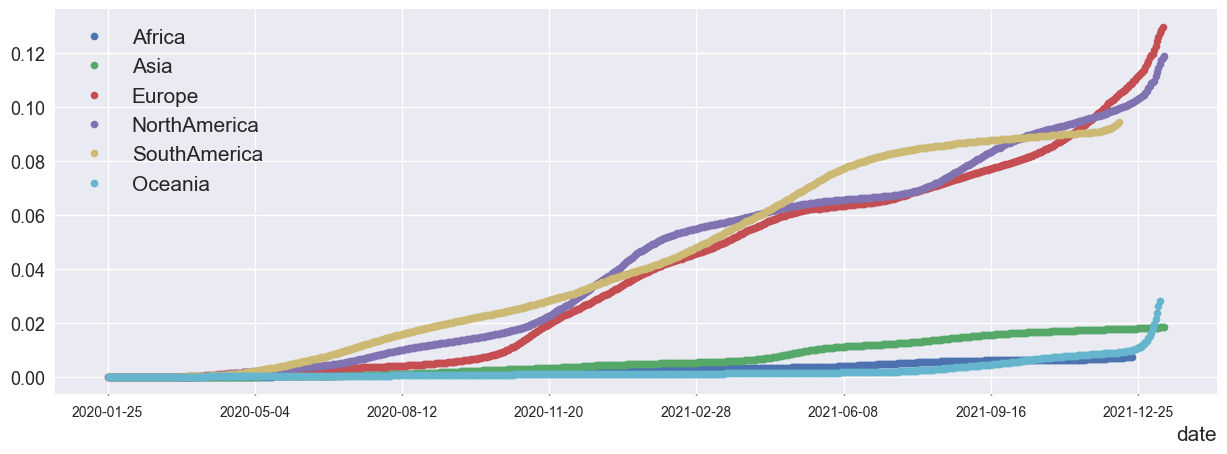

In [39]:
# Add a new column to the dataframe and plot multiple series on the same canvas

# Cases per capita per continent
data["cases_rate"] = data['total_cases'] / data['population']

df1 = data.set_index('location')

# Cases rate by continent
for i, continent in enumerate(continents):
    if i == 0:
        ax = df1.loc[continent].plot(x = 'date', y = 'cases_rate', style = '.', figsize = (15,5), label = continent, title = '')
    else:
        df1.loc[continent].plot(x = 'date', y = 'cases_rate', style = '.', figsize = (15,5), label = continent, ax=ax)

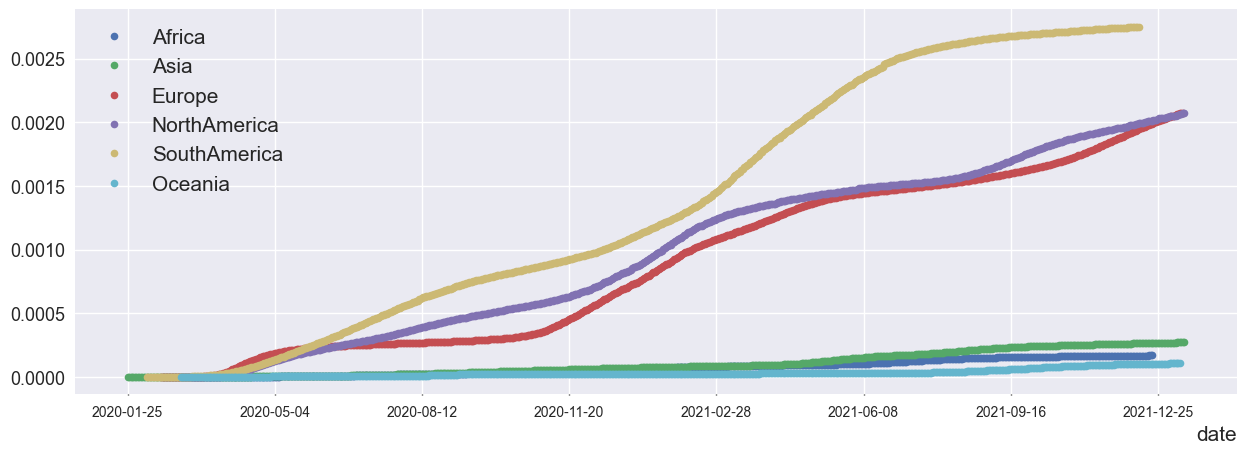

In [40]:
# Deaths per capita per continent

data["death_rate"] = data['total_deaths'] / data['population']

df1 = data.set_index('location')

# Cases rate by continent
for i, continent in enumerate(continents):
    if i == 0:
        ax = df1.loc[continent].plot(x = 'date', y = 'death_rate', style = '.', figsize = (15,5), label = continent, title = '')
    else:
        df1.loc[continent].plot(x = 'date', y = 'death_rate', style = '.', figsize = (15,5), label = continent, ax=ax)

(0.0, 0.11)

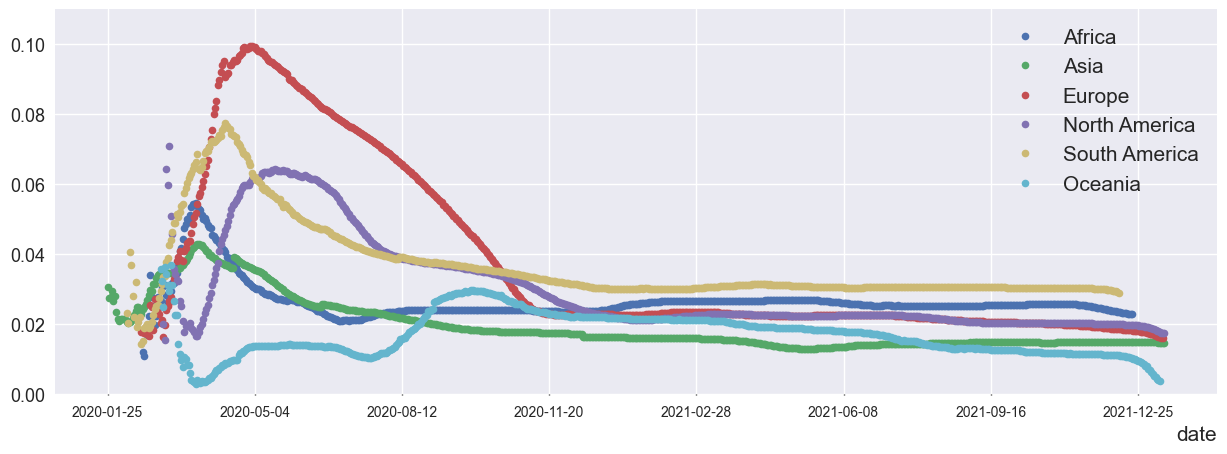

In [41]:
# Deaths / Cases by continent

data["deathCaseRatio"] = data['total_deaths'] / data['total_cases']  # Add new column to dataframe
df1 = data.set_index('location')

for i, continent in enumerate(continents):
    if i == 0:
        ax = df1.loc[continent].plot(x = 'date', y = 'deathCaseRatio', style = '.', figsize = (15,5), label = cont_label[i]) 
    else:
        df1.loc[continent].plot(x = 'date', y = 'deathCaseRatio', style = '.', figsize = (15,5), label = cont_label[i], ax=ax) 

# Adjust the y-axis range        
ax.set_ylim(0, 0.11)

In [42]:
# Plot histograms of every column in owid-covid-data.csv for every country

if make_country_histograms:

    matplotlib.style.use('default')

    countries = list(raw_data['location'].unique())

    # Remove continents (plotted in next cell)
    countries.remove('Africa')
    countries.remove('Asia')
    countries.remove('North America')
    countries.remove('South America')
    countries.remove('Europe')
    countries.remove('Oceania')

    countries_dir = []
    for i, country in enumerate(countries):
        countries_dir.append(country.replace(' ', ''))

    df1 = raw_data.set_index('location')

    for i, country in enumerate(countries):

        dirpath = Path(f'C:/Users/Matth/git/DataAnalysisWorkbooks/Covid19/Figures/raw_data/countries/{countries_dir[i]}')

        if dirpath.exists():
            shutil.rmtree(dirpath)
            os.mkdir(dirpath)

        else:
            os.mkdir(dirpath)

        for j, col in enumerate(raw_data.columns):     
            if j in [0, 1, 2, 3, 33]: continue  # Skip columns without numeric data

            df1.loc[country].hist(col, grid = False, bins = 20)
            plt.savefig(f"C:/Users/Matth/git/DataAnalysisWorkbooks/Covid19/Figures/raw_data/countries/{countries_dir[i]}/{col}.png")
            plt.close()

In [43]:
# Plot histograms of every column in owid-covid-data.csv for every continent

if make_continent_histograms:

    matplotlib.style.use('default')

    continents = list(raw_data['continent'].unique())

    # The unique element at [1] is 'nan', remove it
    continents.pop(1)

    continents_dir = []
    for i, continent in enumerate(continents):
        continents_dir.append(continent.replace(' ', ''))

    df1 = raw_data.set_index('continent')

    for i, continent in enumerate(continents):

        dirpath = Path(f'C:/Users/Matth/git/DataAnalysisWorkbooks/Covid19/Figures/raw_data/continents/{continents_dir[i]}')

        if dirpath.exists():
            shutil.rmtree(dirpath)
            os.mkdir(dirpath)

        else:
            os.mkdir(dirpath)

        for j, col in enumerate(raw_data.columns):     
            if j in [0, 1, 2, 3, 33]: continue  # Skip columns without numeric data

            df1.loc[continent].hist(col, grid = False, bins = 20)
            plt.savefig(f"C:/Users/Matth/git/DataAnalysisWorkbooks/Covid19/Figures/raw_data/continents/{continents_dir[i]}/{col}.png")
            plt.close()

In [44]:
df1 = raw_data.set_index('location')

countries = list(raw_data['location'].unique())
locations = []

# Remove aggregated locations
countries.remove('Africa')
countries.remove('Asia')
countries.remove('North America')
countries.remove('South America')
countries.remove('Europe')
countries.remove('Oceania')
countries.remove('World')
countries.remove('Low income')
countries.remove('High income')
countries.remove('Lower middle income')
countries.remove('Upper middle income')

for i, country in enumerate(countries):
    locations.append( Location() )
    
    temp = df1.loc[country]
    locations[i].name = country
    locations[i].population = temp['population'].max()
    
    locations[i].cases = temp['total_cases'].max()
    locations[i].deaths = temp['total_deaths'].max()
    locations[i].vaccinated = temp['people_fully_vaccinated'].max()
    
    locations[i].casesPerCapita = locations[i].cases / locations[i].population
    locations[i].deathsPerCapita = locations[i].deaths / locations[i].population
    locations[i].vaccinatedPerCapita = locations[i].vaccinated / locations[i].population
    
    
name, casesPerCapita, deathsPerCapita, vaccinatedPerCapita = [], [], [], []

for i in range(len(locations)):
    name.append(locations[i].name)
    casesPerCapita.append(locations[i].casesPerCapita)
    deathsPerCapita.append(locations[i].deathsPerCapita)
    vaccinatedPerCapita.append(locations[i].vaccinatedPerCapita)

In [45]:
# Create a dataframe for list of countries and their current total_cases

d = {'Country': countries, 'Cases per capita': casesPerCapita, 'Deaths per capita': deathsPerCapita, 'Vaccinated per capita': vaccinatedPerCapita}
df = pd.DataFrame(d)

In [46]:
# Box-and-whisker plots of per capita data
matplotlib.style.use('default')

df.boxplot('Cases per capita', figsize=(4, 4), grid = False)
plt.savefig(f"C:/Users/Matth/git/DataAnalysisWorkbooks/Covid19/Figures/box_plots/casesPerCapita.png")
plt.close()

df.boxplot('Deaths per capita', figsize=(4, 4), grid = False)
plt.savefig(f"C:/Users/Matth/git/DataAnalysisWorkbooks/Covid19/Figures/box_plots/deathsPerCapita.png")
plt.close()

df.boxplot('Vaccinated per capita', figsize=(4, 4), grid = False)
plt.savefig(f"C:/Users/Matth/git/DataAnalysisWorkbooks/Covid19/Figures/box_plots/vaccinatedPerCapita.png")
plt.close()

In [56]:
# Rank order the top ten countries with the highest Covid19 cases per capita

df1 = df.dropna()
df1.sort_values('Cases per capita', axis=0, ascending = False, ignore_index = True).head(10).drop('Vaccinated per capita', 1).drop('Deaths per capita', 1)

,Country,Cases per capita
0,Andorra,0.341392
1,Montenegro,0.302967
2,Gibraltar,0.293580
3,Seychelles,0.272652
4,San Marino,0.267421
5,Slovakia,0.255874
6,Aruba,0.255534
7,Georgia,0.241188
8,Slovenia,0.236099
9,Czechia,0.235734


In [52]:
df1.sort_values('Deaths per capita', axis=0, ascending = False, ignore_index = True).head(10).drop('Cases per capita', 1).drop('Vaccinated per capita', 1)

,Country,Deaths per capita
0,Peru,0.006086
1,Bulgaria,0.004576
2,Bosnia and Herzegovina,0.004158
3,Hungary,0.004129
4,Montenegro,0.003888
5,North Macedonia,0.003857
6,Georgia,0.003565
7,Czechia,0.003412
8,Croatia,0.003155
9,Slovakia,0.003106


In [55]:
df1.sort_values('Vaccinated per capita', axis=0, ascending = False, ignore_index = True).head(10).drop('Cases per capita', 1).drop('Deaths per capita', 1).drop(0, 0)

,Country,Vaccinated per capita
1,United Arab Emirates,0.916661
2,Portugal,0.898606
3,Brunei,0.872902
4,Singapore,0.870000
5,Chile,0.865806
6,Cuba,0.858807
7,Cayman Islands,0.855529
8,Malta,0.846964
9,China,0.841895
